

# Project: Investigate a Dataset (IMDB movie)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 10,000 films from IMDB and focuses on the issue of budget per film, number of votes, and other characteristics..
The questions are :
What are the top 10 movies in terms of high rating? What are the top 10 movies in terms of low rating?
What is the longest movie? How many minutes is it?
What are the three years that most films have been produced?

In [17]:
# Import all of the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [18]:
# Load my data
da = pd.read_csv ('TMDB-movies-data.csv')
da.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [19]:
da.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [21]:
da.shape

(10866, 21)

### Data Cleaning (Replace this with more specific notes!)

In [22]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
 
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [23]:
# Finds the number of null values for each column
da.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [25]:
# I have many null values in some columns so I will delete these columns,
# especially since I don't need them in my analysis

da.drop('cast', axis=1, inplace=True)
da.drop('homepage', axis=1, inplace=True)
da.drop('tagline', axis=1, inplace=True)
da.drop('keywords', axis=1, inplace=True)
da.drop('production_companies', axis=1, inplace=True)

# or I can do this
# da.drop(['cast', 'homepage', 'tagline', 'keywords', 'production_companies'], axis=1, inplace=True)

In [29]:
# Now I want to check that I deleted the columns I don't need
da.isnull().sum()

id                 0
imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [32]:
# Now I have 3 columns that have rows (null so I will delete these rows
da.dropna(inplace=True)

In [33]:
da.isnull().sum()

id                0
imdb_id           0
popularity        0
budget            0
revenue           0
original_title    0
director          0
overview          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [30]:
# The shape of the data will change because I deleted some columns
da.shape

(10866, 16)

In [34]:
# Now I will find out the number of duplicates and then I will delete the duplicate
da.duplicated().sum()

1

In [35]:
# drop duplicates
da.duplicated()
da.duplicated().sum()
da.drop_duplicates(inplace=True)

In [36]:
# confirm correction by rechecking for duplicates in the data
sum(da.duplicated())

0

In [41]:
da.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10793.000000,10793.000000,1.079300e+04,1.079300e+04,10793.000000,10793.000000,10793.000000,10793.000000,1.079300e+04,1.079300e+04
mean,65559.266376,0.649694,1.472068e+07,4.009156e+07,102.223941,218.729454,5.970583,2001.284166,1.766582e+07,5.171065e+07
std,91760.206943,1.002707,3.099455e+07,1.173529e+08,30.751141,577.329995,0.932890,12.821859,3.439224e+07,1.450593e+08
min,5.000000,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10567.000000,0.209216,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20443.000000,0.385532,0.000000e+00,0.000000e+00,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,74643.000000,0.718104,1.600000e+07,2.463747e+07,112.000000,147.000000,6.600000,2011.000000,2.103337e+07,3.410449e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [89]:
# There are missing values in budget and revenue . so I will fix this problem.
print("budget:",da[(da['budget']==0)].shape[0])
print("revenue:",da[(da['revenue']==0)].shape[0])

budget: 5630
revenue: 5945


In [91]:
da['budget']=da['budget'].replace(0,da['budget'].mean())
da['revenue']=da['revenue'].replace(0,da['revenue'].mean())

In [92]:
print("budget:",da[(da['budget']==0)].shape[0])
print("revenue:",da[(da['revenue']==0)].shape[0])

budget: 0
revenue: 0


In [93]:
da.head()

,id,imdb_id,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [94]:
da.info()
da.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10793 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10793 non-null  int64  
 1   imdb_id         10793 non-null  object 
 2   popularity      10793 non-null  float64
 3   budget          10793 non-null  float64
 4   revenue         10793 non-null  float64
 5   original_title  10793 non-null  object 
 6   director        10793 non-null  object 
 7   overview        10793 non-null  object 
 8   runtime         10793 non-null  int64  
 9   genres          10793 non-null  object 
 10  release_date    10793 non-null  object 
 11  vote_count      10793 non-null  int64  
 12  vote_average    10793 non-null  float64
 13  release_year    10793 non-null  int64  
 14  budget_adj      10793 non-null  float64
 15  revenue_adj     10793 non-null  float64
dtypes: float64(6), int64(4), object(6)
memory usage: 1.4+ MB


(10793, 16)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (What are the top 10 movies in terms of high rating? What are the top 10 movies in terms of low rating?)

In [95]:
da_vote_average_high = da.groupby ('original_title') ['vote_average'].max().sort_values(ascending=False).head(10)
da_vote_average_high

original_title
The Story of Film: An Odyssey                                      9.2
The Mask You Live In                                               8.9
Life Cycles                                                        8.8
Black Mirror: White Christmas                                      8.8
Pink Floyd: Pulse                                                  8.7
Queen - Rock Montreal                                              8.5
A Personal Journey with Martin Scorsese Through American Movies    8.5
The Art of Flight                                                  8.5
Dave Chappelle: Killin' Them Softly                                8.5
Rush: Beyond the Lighted Stage                                     8.4
Name: vote_average, dtype: float64

Text(0, 0.5, 'original title')

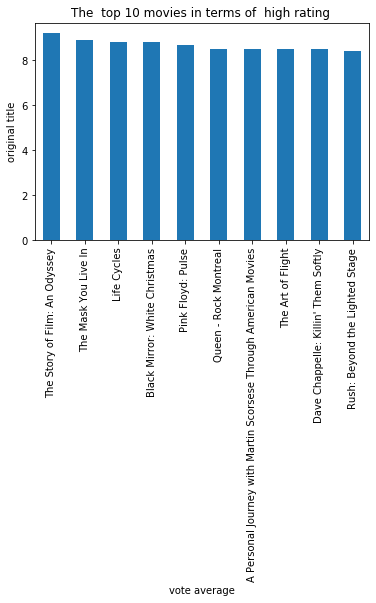

In [114]:
da_vote_average_high_plot = da_vote_average_high.plot(kind="bar",title="The  top 10 movies in terms of  high rating ",figsize=(6,4));
plt.xlabel("vote average")
plt.ylabel("original title")

We note that the top 10 films have a rating between 9.2 and 8.4, and it is strange that there is no movie with a rating of 10/10


In [115]:
da_vote_average_low = da.groupby ('original_title') ['vote_average'].min().sort_values(ascending=False).tail(10)
da_vote_average_low

original_title
Dracula 3000                    2.3
Foodfight!                      2.2
Atlantic Rim                    2.2
The Sleeper                     2.2
Sand Sharks                     2.1
Birdemic: Shock and Terror      2.1
Superbabies: Baby Geniuses 2    2.1
Jurassic Shark                  2.0
Transmorphers                   1.5
Manos: The Hands of Fate        1.5
Name: vote_average, dtype: float64

Text(0, 0.5, 'original_title')

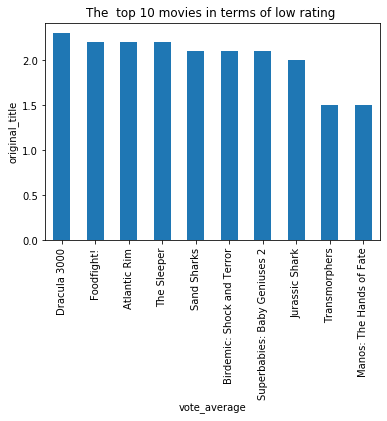

In [116]:
da_vote_average_low_plot = da_vote_average_low.plot(kind="bar",title="The  top 10 movies in terms of low rating ",figsize=(6,4));
plt.xlabel("vote_average")
plt.ylabel("original_title")

The lowest 10 films in the rating range between 2.3 and 1.5 out of 10, and the lowest is The Hands of Fate


### Research Question 2  (What is the longest movie? How many minutes is it?)

In [98]:
longest_movie = da.groupby ('original_title') ['runtime'].max().sort_values(ascending=False).head(1)
longest_movie

original_title
The Story of Film: An Odyssey    900
Name: runtime, dtype: int64

Text(0.5, 1.0, 'longest movie')

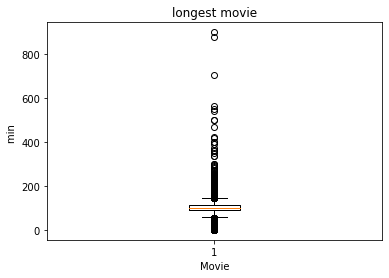

In [110]:
plt.boxplot(da.runtime)
plt.xlabel("Movie")
plt.ylabel("min ")
plt.title("longest movie")

We note here that the longest movie is The Story of Film: An Odyssey, which is also the highest rated movie, with a rating of 9.2

### Research Question 3  (What are the three years that most films have been produced?)

In [122]:
# This code filter the 10 largest years and then order by year:
most_year=da.groupby("release_year")['release_year'].count().nlargest(10).sort_index()
most_year

release_year
2006    408
2007    433
2008    488
2009    526
2010    479
2011    537
2012    581
2013    651
2014    694
2015    624
Name: release_year, dtype: int64

Text(0, 0.5, 'Count of movies')

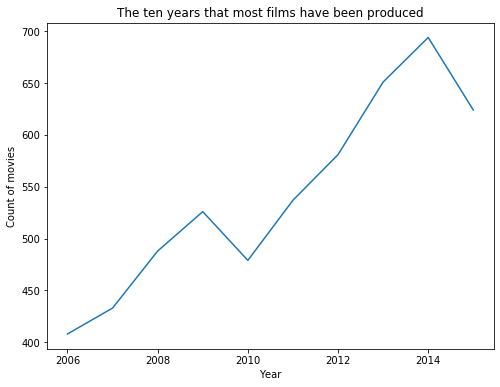

In [120]:
most_year.plot (title="The ten years that most films have been produced",figsize=(8,6));

plt.xlabel("Year")
plt.ylabel("Count of movies")

In [ ]:
We note here that 2015 is the year in which films were produced the most.

<a id='conclusions'></a>
## Conclusions

1- The most highly rated movie is (The Story of Film: An Odyssey), where it has a rating of 9.2 , and this movie is the longest movie with a duration of 900 minutes, or 15 hours!

2- The two films with the lowest ratings are (Transmorphers) and (Manos: The Hands of Fate), with only 1.5 ratings!

3- The year in which the most films were produced is 2014 followed by 2013

## Limitations

1- The missing data has been replaced by the mean . 

2- I deleted some columns that I thought were not useful to me in my analysis .

3- These films are not renewable, so it is possible that when a person searches for a movie in 2021, for example, he does not find it .
